In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


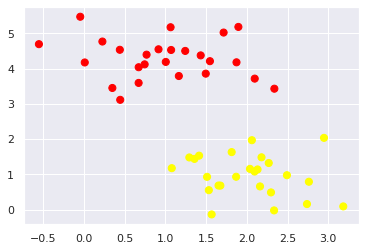

In [2]:
from sklearn.datasets.samples_generator import make_blobs
x,y = make_blobs(n_samples=50,centers=2,
                random_state=0,cluster_std=0.60)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

(-1.0, 3.5)

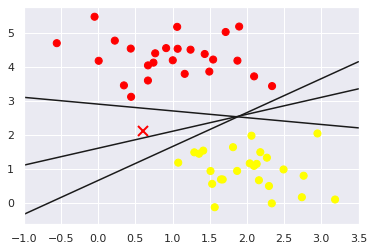

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m ,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5)

## 基本的SVM

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x,y)

SVC(kernel='linear')

### 绘图函数

In [5]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors="k",
              levels=[-1,0,1],alpha=0.5,
              linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none')
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    
    

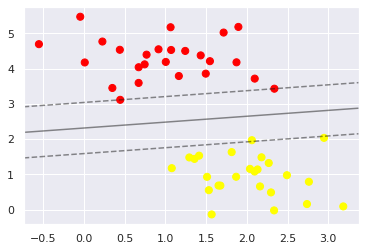

In [6]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [8]:
def plot_svm(N=10,ax=None):
    x,y = make_blobs(n_samples=200,centers=2,
                    random_state=0,cluster_std=0.60)
    x = x[:N]
    y = y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(x,y)
    
    ax = ax or plt.gca()
    ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)

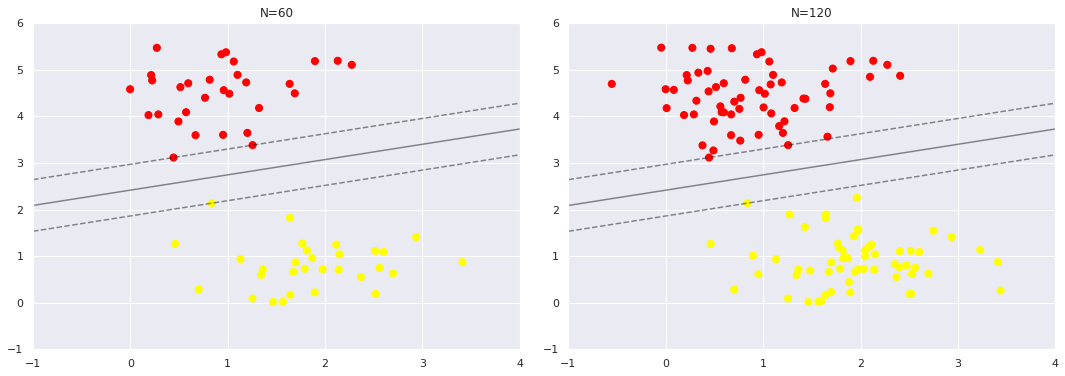

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

## 引入核函数的SVM

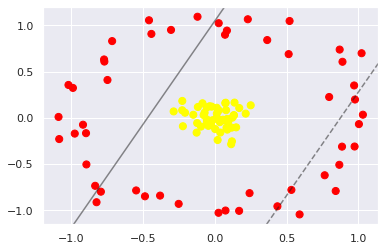

In [10]:
from sklearn.datasets.samples_generator import make_circles
x,y = make_circles(100,factor=.1,noise=.1)
clf = SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
plot_svc_decision_function(clf,plot_support=False)

### 高维核变换

In [11]:
from mpl_toolkits import mplot3d
r = np.exp(-(x**2).sum(1))
def plot_3D(elev=30,azim=30,x=x,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=50,cmap="autumn")
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')


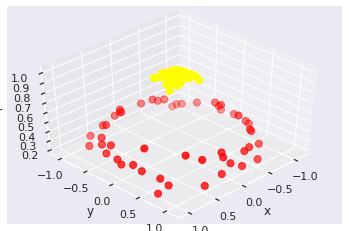

In [12]:
plot_3D(elev=45,azim=45,x=x,y=y)

### 径向基函数

In [13]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(x,y)

SVC(C=1000000.0)

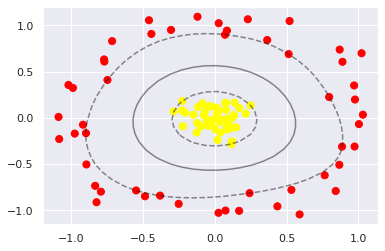

In [14]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
plot_svc_decision_function(clf)

## 调节SVM参数: Soft Margin 问题

### 调节C参数
+ 当C趋近于无穷大时：意味着分类严格木能有错误
+ 当C趋近于很小的时：意味着可以有更大的错误容忍

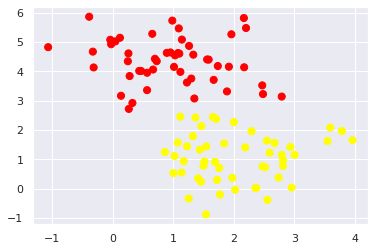

In [15]:
x,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

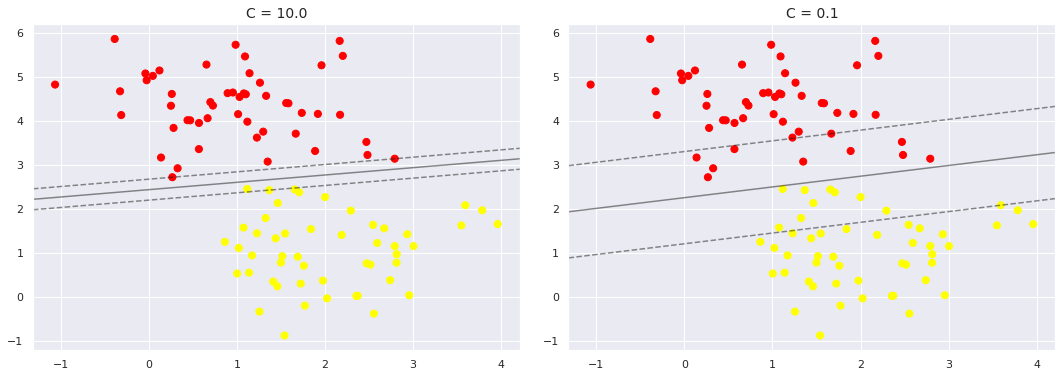

In [16]:
x,y = make_blobs(n_samples=100,centers=2,
                random_state=0,cluster_std=0.8)
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[10.0,0.1]):
    model = SVC(kernel='linear',C=C).fit(x,y)
    axi.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,lw=1,facecolors="none")
    axi.set_title('C = {0:.1f}'.format(C),size=14)

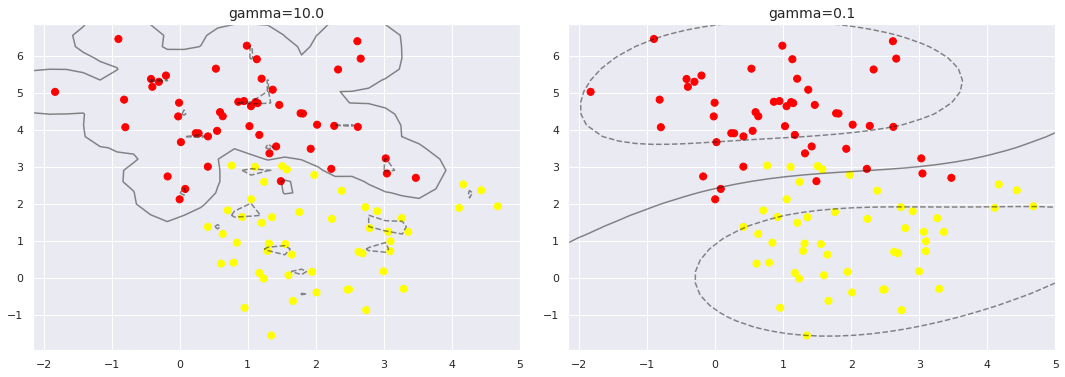

In [17]:
x,y = make_blobs(n_samples=100,centers=2,
                random_state=0,cluster_std=1.1)
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,gamma in zip(ax,[10.0,0.1]):
    model = SVC(kernel="rbf",gamma=gamma).fit(x,y)
    axi.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,lw=1,facecolors='none')
    axi.set_title("gamma={0:.1f}".format(gamma),size=14)

## 人脸辨认


这部分下载太慢了，就去谷歌跑了，谷歌666

In [19]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

KeyboardInterrupt: 

In [ ]:
fig,ax = plt.subplots(3,5)
for i ,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap='bone')
  axi.set(xticks=[],yticks=[],
      xlabel=faces.target_names[faces.target[i]])